In [1]:
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io
import cv2


In [2]:

def ImageDenoise(image_name):
    #img = cv2.imread('lena.jpeg')
    img = skimage.io.imread('lena.bmp')
    img = skimage.img_as_float(img)


    sigma = 0.1
    
    imgn = random_noise(img, var=sigma**2)
    #imgn = skimage.io.imread(image_name)

    sigma_est = estimate_sigma(imgn, average_sigmas=True)


    img_bayes = denoise_wavelet(imgn, method='BayesShrink', mode='soft',
                                wavelet_levels=5, wavelet='bior6.8', rescale_sigma=True)
    img_visushrink = denoise_wavelet(imgn, method='VisuShrink', mode='soft', sigma=sigma_est/4, wavelet_levels=3,
                                     wavelet='bior6.8', rescale_sigma=True)


    psnr_noisy = peak_signal_noise_ratio(img, imgn)
    psnr_bayes = peak_signal_noise_ratio(img, img_bayes)
    psnr_visu = peak_signal_noise_ratio(img, img_visushrink)


    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title("Original image", fontsize=15)


    plt.subplot(2, 2, 2)
    plt.imshow(imgn, cmap=plt.cm.gray)
    plt.title("Noisy image", fontsize=15)


    plt.subplot(2, 2, 3)
    plt.imshow(img_bayes, cmap=plt.cm.gray)
    plt.title("Denoised image B", fontsize=15)


    plt.subplot(2, 2, 4)
    plt.imshow(img_visushrink, cmap=plt.cm.gray)
    plt.title("Denoised image V", fontsize=15)


    plt.show()

    print(' Original vs NoisyImage', psnr_noisy)
    print('Original vs visushrink Image', psnr_visu)
    print('Original v bayes Image', psnr_bayes)


C:\Users\rohit\anaconda3\lib\site-packages\skimage\restoration\_denoise.py:856: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior6.8, results are likely to be suboptimal.
  out = _wavelet_threshold(image, wavelet=wavelet, method=method,
C:\Users\rohit\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


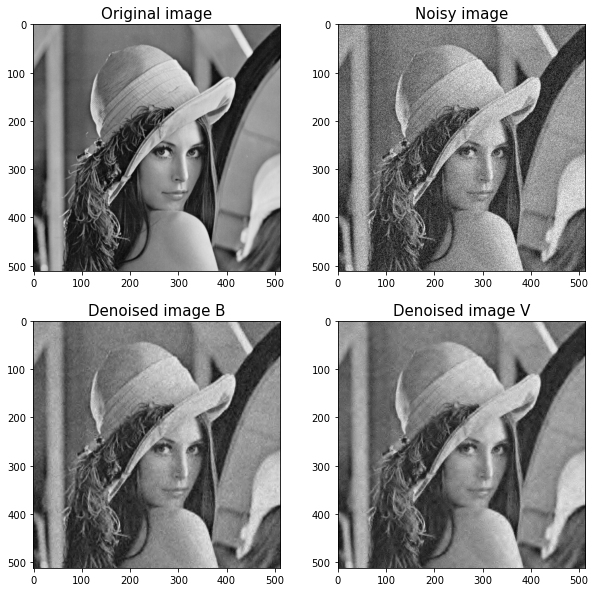

 Original vs NoisyImage 20.054668042726355
Original vs visushrink Image 27.656921940210605
Original v bayes Image 29.130786218463488


In [3]:
ImageDenoise('lena.bmp')